In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")

data.head()

,success,3D_secured,hour,day_of_week,month,amount_norm,card_Diners,card_Master,card_Visa,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,0,0,0.0,0.166667,0.0,0.133013,0,0,1,0,1,0,0,0,0,1
1,1,0,0.0,0.166667,0.0,0.133013,0,0,1,0,1,0,0,0,0,1
2,0,1,0.0,0.166667,0.0,0.371795,1,0,0,0,1,0,0,0,0,1
3,1,1,0.0,0.166667,0.0,0.371795,1,0,0,0,1,0,0,0,0,1
4,0,0,0.0,0.166667,0.0,0.189103,1,0,0,1,0,0,0,0,1,0


In [3]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# create a function to evaluate the models
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return [accuracy, precision, recall, f1]

Accuracy: 0.7973616345963103
Precision: 0.5211267605633803
Recall: 0.018084066471163247
F1: 0.03495512517713746


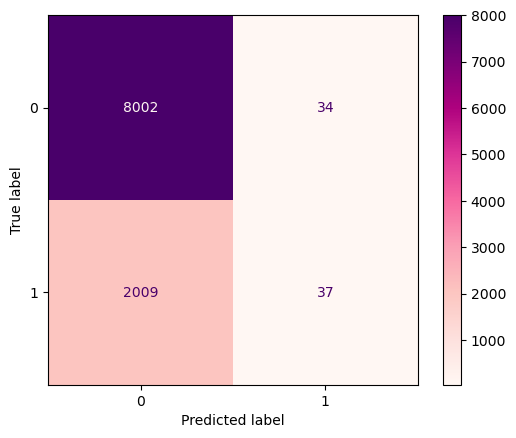

In [15]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Evaluate the model 
score_log = evaluate(y_test, y_pred)
print(f"Accuracy: {score_log[0]}\nPrecision: {score_log[1]}\nRecall: {score_log[2]}\nF1: {score_log[3]}")

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [16]:
# Create a class balanced data set with SMOTE to retrain models on
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.6559214441579052
Precision: 0.26556836902800657
Recall: 0.3939393939393939
F1: 0.3172603818146034


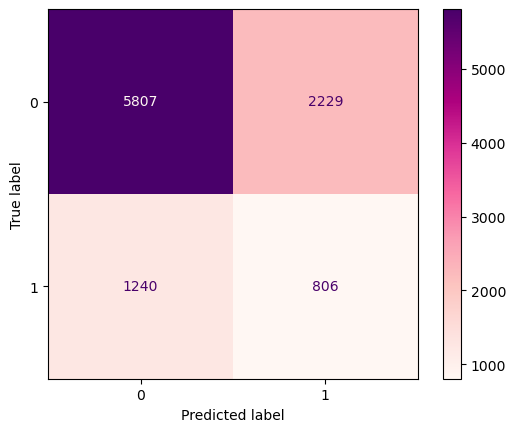

In [17]:
# Train a new logistic regression model with SMOTE balanced classes
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test)

# Evalute Accuracy
score_log_bal = evaluate(y_test, smote_y_pred)
print(f"Accuracy: {score_log_bal[0]}\nPrecision: {score_log_bal[1]}\nRecall: {score_log_bal[2]}\nF1: {score_log_bal[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, smote_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')
plt.show()

Accuracy: 0.7523308867288236
Precision: 0.27106598984771574
Recall: 0.13049853372434017
F1: 0.17617947871989442


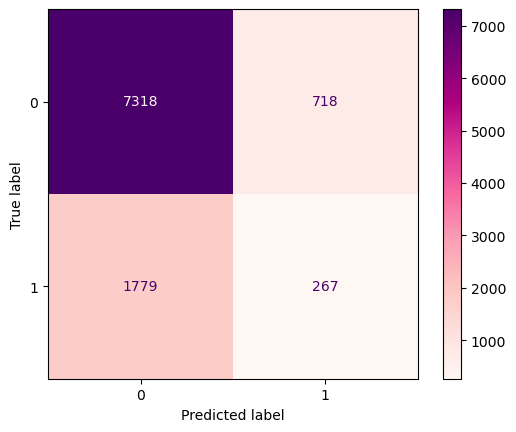

In [18]:
#Random forest model without SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#assess accuracy
score_rf = evaluate(y_test, y_pred_rf)
print(f"Accuracy: {score_rf[0]}\nPrecision: {score_rf[1]}\nRecall: {score_rf[2]}\nF1: {score_rf[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7523308867288236
Precision: 0.27106598984771574
Recall: 0.13049853372434017
F1: 0.17617947871989442


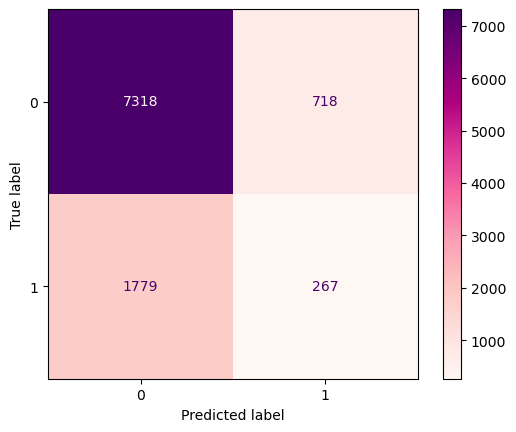

In [19]:
#Random forest model with scikit balanced
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_model.predict(X_test)

#assess accuracy
score_rf_bal = evaluate(y_test, y_pred_rf_balanced)
print(f"Accuracy: {score_rf_bal[0]}\nPrecision: {score_rf_bal[1]}\nRecall: {score_rf_bal[2]}\nF1: {score_rf_bal[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_balanced)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.698373338623289
Precision: 0.28964059196617337
Recall: 0.33479960899315736
F1: 0.31058716844253004


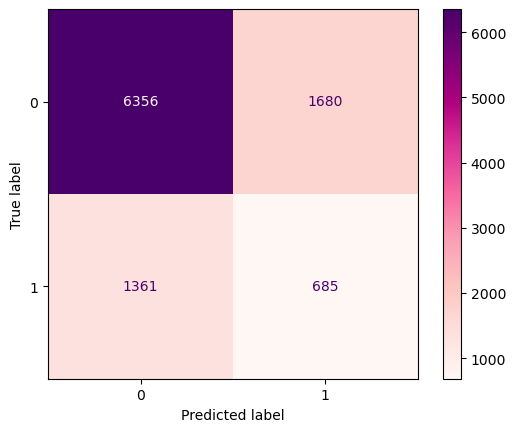

In [20]:
#Train Random forest Model with SMOTE balanced classes
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

#Assess accuracy for randomforest model
score_rf_smote = evaluate(y_test, y_pred_rf_smote)
print(f"Accuracy: {score_rf_smote[0]}\nPrecision: {score_rf_smote[1]}\nRecall: {score_rf_smote[2]}\nF1: {score_rf_smote[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6368776036500694
Precision: 0.2905317769130999
Recall: 0.5474095796676441
F1: 0.37959667852906287


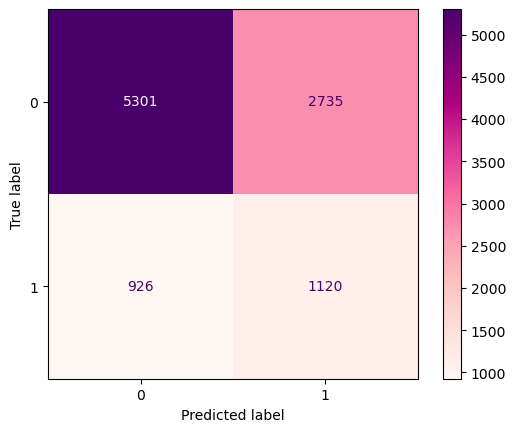

In [30]:
# Train a model with gradient boosting
gb_model = GradientBoostingClassifier(random_state=42, max_depth=3)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)

# Evalutate Accuracy
score_gb = evaluate(y_test, y_pred_gb)
print(f"Accuracy: {score_gb[0]}\nPrecision: {score_gb[1]}\nRecall: {score_gb[2]}\nF1: {score_gb[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7970640745883754
Precision: 0.0
Recall: 0.0
F1: 0.0


c:\Users\Phil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


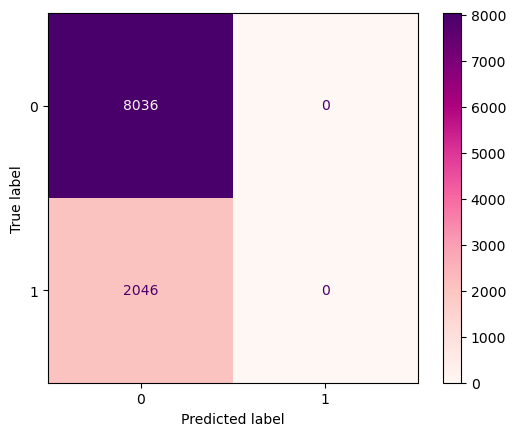

In [27]:
# Train a model using SVM
# Need a scalar for the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evalutate Accuracy
score_svm = evaluate(y_test, y_pred_svm)
print(f"Accuracy: {score_svm[0]}\nPrecision: {score_svm[1]}\nRecall: {score_svm[2]}\nF1: {score_svm[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [28]:
results = pd.DataFrame()
results['Key'] = ['Accuracy', 'Precision', 'Recall', 'F1']
results['Logistic'] = score_log
results['Logistic_Balanced'] = score_log_bal
results['RandomForest'] = score_rf
results['RandomForest_Balanced'] = score_rf_bal
results['RandomForest_SMOTE'] = score_rf_smote
results['GradientBoosting'] = score_gb
results.T

,0,1,2,3
Key,Accuracy,Precision,Recall,F1
Logistic,0.797362,0.521127,0.018084,0.034955
Logistic_Balanced,0.655921,0.265568,0.393939,0.31726
RandomForest,0.752331,0.271066,0.130499,0.176179
RandomForest_Balanced,0.752331,0.271066,0.130499,0.176179
RandomForest_SMOTE,0.698373,0.289641,0.3348,0.310587
GradientBoosting,0.636878,0.290532,0.54741,0.379597


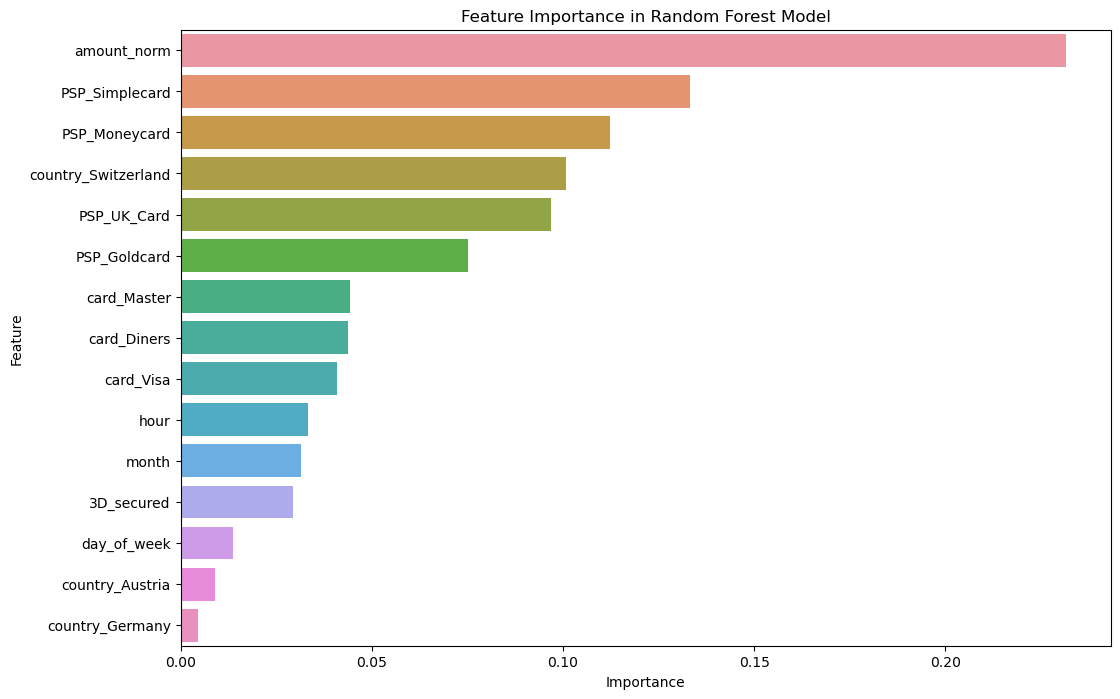

,Feature,Importance
4,amount_norm,0.231635
13,PSP_Simplecard,0.133160
12,PSP_Moneycard,0.112216
10,country_Switzerland,0.100669
14,PSP_UK_Card,0.096749
11,PSP_Goldcard,0.075261
6,card_Master,0.044346
5,card_Diners,0.043786
7,card_Visa,0.040920
1,hour,0.033336


In [32]:
feature_importances = gb_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df

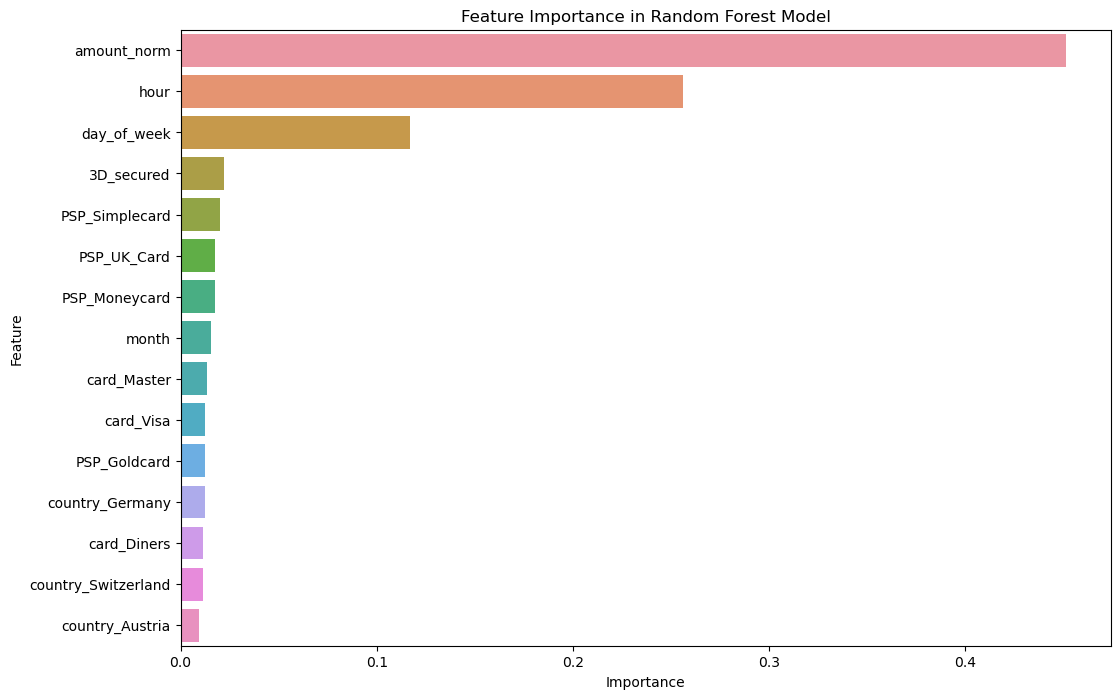

,Feature,Importance
4,amount_norm,0.451785
1,hour,0.256251
2,day_of_week,0.117171
0,3D_secured,0.021856
13,PSP_Simplecard,0.020065
14,PSP_UK_Card,0.017611
12,PSP_Moneycard,0.017301
3,month,0.015408
6,card_Master,0.013573
7,card_Visa,0.012538


In [33]:
feature_importances = rf_model_smote.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df